In [ ]:
# Code for Traveling Salesman Problem: Branch and Bound
# Language: Python3
# Author: Pranav Ghaskadbi

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from google.colab import drive
import plotly.express as px
from math import radians, cos, sin, asin, sqrt
import numpy as np
import time

In [ ]:
maximum_size = float('inf')

In [ ]:
# Function used for copying the temporary solution to the final solution
# temp_path -> where the solution is being stored which would later be copied to path_to_take[]
def tempToFinal(temp_path):
    path_to_take[:N + 1] = temp_path[:]
    path_to_take[N] = temp_path[0]

In [ ]:
# Function used for finding the cost of the minimum edge ending at vertex i
# adj is the adjacency matrix
# i is a row in the adjacency matrix
def costMinEdge(adj, i):
    min = maximum_size
    for k in range(N):
        if adj[i][k] < min and i != k:
            min = adj[i][k]
 
    return min

In [ ]:
# Function used for finding the edge with the second minimum cost having an endpoint at vertex i
# adj is the adjacency matrix
# i is a row in the adjacency matrix
def costSecondMinEdge(adj, i):
    first, second = maximum_size, maximum_size
    for j in range(N):
        if i == j:
            continue
        if adj[i][j] <= first:
            second = first
            first = adj[i][j]
 
        elif(adj[i][j] <= second and
             adj[i][j] != first):
            second = adj[i][j]
 
    return second

In [ ]:
# Recursive TSP branch and bound function that takes as arguments 
# Builds the search space tree recursively by iterating for all the vertices
#The adjacency matrix, the lower bound of the root node, the path_weight, the current level in the search space tree, the current path, visited nodes.


#   temp_lower_bound -> lower bound of the root node
#   path_weight-> stores the weight of the path so far
#   level-> current level while moving in the search space tree
#   temp_path[] -> where the solution is being stored which would later be copied to path_to_take[]
#   visited[] -> keeps track of the already visited nodes in a particular path
def TSP_BnB_Recursive(adj, temp_lower_bound, path_weight,level, temp_path, visited): 
              
    global minimum_cost
     
    # The base case is where level N has been reached - implying that all nodes are covered once
    if level == N:
         
        # Check if an edge exists from the last vertex in the path back to the first vertex
        if adj[temp_path[level - 1]][temp_path[0]] != 0:
             
            # curr_total_wt has the total weight of the obtained solution
            curr_total_wt = path_weight + adj[temp_path[level - 1]]\
                                        [temp_path[0]]
            if curr_total_wt < minimum_cost:
                tempToFinal(temp_path)
                minimum_cost = curr_total_wt
        return
 
    # For any non N level, build the search space tree recursively by iterating for all the vertices
    for i in range(N):
         
        # Consider the next vertex if not the vertex itself or previously visited
        if (adj[temp_path[level-1]][i] != 0 and visited[i] == False):                
            temp = temp_lower_bound
            path_weight += adj[temp_path[level - 1]][i]
 
            # Level 2 needs a different current bound evaluation than from the other levels
            if level == 1:
                temp_lower_bound -= ((costMinEdge(adj, temp_path[level - 1]) + costMinEdge(adj, i)) / 2)
                                
            else:
                temp_lower_bound -= ((costSecondMinEdge(adj, temp_path[level - 1]) + costMinEdge(adj, i)) / 2)               
 
            # temp_lower_bound + path_weight is the actual lower bound for the node that we have arrived on.
            # If current lower bound < minimum_cost, we need to explore the node further
            if temp_lower_bound + path_weight < minimum_cost:
                temp_path[level] = i
                visited[i] = True
                 
                # call TSP_BnB_Recursive for the next level
                TSP_BnB_Recursive(adj, temp_lower_bound, path_weight,level + 1, temp_path, visited)
 
            # Else we prune the node by resetting all changes to path_weight and temp_lower_bound
            path_weight -= adj[temp_path[level - 1]][i]
            temp_lower_bound = temp
 
            # We reset the visited array
            visited = [False] * len(visited)
            for j in range(level):
                if temp_path[j] != -1:
                    visited[temp_path[j]] = True

In [ ]:
# Function used to set up the path_to_take

def TSP_Branch_and_Bound(adj):
     
    # Calculate initial lower bound for the root node
    # Formula for Initial Lower Bound:  1/2 * (sum of first min + second min) for all edges. 
    # Initialize the temp_path and visited array
    temp_lower_bound = 0

    temp_path = [-1] * (N + 1)
    visited = [False] * N
 
    # Find the initial bound
    for i in range(N):
        temp_lower_bound += (costMinEdge(adj, i) + costSecondMinEdge(adj, i))
 
    # Save the lower bound as an integer
    temp_lower_bound = math.ceil(temp_lower_bound / 2)
 
    # The first vertex in temp_path[] is 0 since the start is at vertex 1
    visited[0] = True
    temp_path[0] = 0
 
    # Call to TSP_BnB_Recursive for path_weight equal to 0 and level 1
    TSP_BnB_Recursive(adj, temp_lower_bound, 0, 1, temp_path, visited)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data in dataframe df
df = pd.read_csv("/content/drive/MyDrive/CS255_Project/25_parks_around_sjsu_lat_long.csv")

In [ ]:
df

,Unnamed: 0,Address,latitude,longitude
0,0,"1 Washington Sq, San Jose, CA 95192",37.340000,-121.880000
1,1,"N 2nd St &, E St James St, San Jose, CA 95112",37.339628,-121.891679
2,2,"E William St & S 16th St, San Jose, CA 95112",37.335841,-121.869643
3,3,"310 W San Fernando St #286, San Jose, CA 95113",37.331541,-121.894753
4,4,"W St James St, San Jose, CA 95110",37.338199,-121.894729
5,5,"249-225 E William St, San Jose, CA 95112",37.331108,-121.879572
6,6,"510 S First St, San Jose, CA 95113",37.328488,-121.884455
7,7,"N Autumn St, San Jose, CA 95113",37.334325,-121.900621
8,8,"955 S Sixth St, San Jose, CA 95112",37.324138,-121.875518
9,9,"438 Coleman Ave, San Jose, CA 95110",37.341529,-121.902996


In [ ]:
# Displays a Scatter Plot of the locations provided in the location dataframe
def showLocationScatterPlot(location_df):
  color_scale = [(0, 'purple'), (1,'red')]

  fig = px.scatter_mapbox(location_df,lat='latitude',lon='longitude', 
                          hover_name="Address", 
                          color_continuous_scale = color_scale,zoom=11)

  fig.update_layout(mapbox_style="open-street-map")
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()

In [ ]:
showLocationScatterPlot(df)

In [ ]:
# from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
# Convert dataframe into an 2D Adjacency Matrix
def createAdjacencyMatrix(location_df):
  location_count = df.shape[0]
  adj = [[0 for i in range(location_count)] for j in range(location_count)]

  for i, row in location_df.iterrows():
    for j, row in location_df.iterrows():
      if i == j:
        adj[i][j] = 0
      else:
        adj[i][j] = haversine(location_df.iloc[i]["latitude"], location_df.iloc[i]["longitude"], location_df.iloc[j]["latitude"], location_df.iloc[j]["longitude"])
  return adj

In [ ]:
adj = createAdjacencyMatrix(df)

In [ ]:
# Below is the Adjacency Matrix Generated - It is used for our TSP

In [ ]:
# [[0,
#   1.033361637572846,
#   1.025805066481633,
#   1.608129681490159,
#   1.3174627005955968,
#   0.9894455233404585,
#   1.3393137936754025,
#   1.9292284960142607,
#   1.8076959534459627,
#   2.0400354474866513,
#   1.258867305609958,
#   2.3898541205602752,
#   0.9629896227759807,
#   1.4014290084849361,
#   1.4594924938401428,
#   2.8518138763261267,
#   1.2245353779055177,
#   1.7531126166846454,
#   2.77634488518524,
#   2.578742826466106,
#   2.5636661799073903,
#   1.7280671098777303,
#   2.567344194999138,
#   1.9430550004784164,
#   1.9313281026753084],
#  [1.033361637572846,
#   0,
#   1.9932229432605142,
#   0.9394882008540194,
#   0.3129804272807364,
#   1.4294511066944526,
#   1.3937199802774398,
#   0.9862783485699181,
#   2.237983767042387,
#   1.0225016874704371,
#   0.8279514005684379,
#   2.242155287814365,
#   0.8049570868380116,
#   2.369999814463352,
#   0.5583267758445625,
#   2.848432980098025,
#   0.8688996600239566,
#   1.2742638330019096,
#   2.9658322156255297,
#   3.0667902185986247,
#   1.6987415592583406,
#   0.8649941861708197,
#   1.6113766919845083,
#   1.1882504395554747,
#   2.6122460148227162],
#  [1.025805066481633,
#   1.9932229432605142,
#   0,
#   2.271002201115339,
#   2.2333020083081205,
#   1.0235907186671456,
#   1.5439502701857986,
#   2.744030728299101,
#   1.4011462436703976,
#   3.0157178770929782,
#   1.8767104970658806,
#   2.4608187714261844,
#   1.562581989776752,
#   0.378616126933835,
#   2.471684307678695,
#   2.7080376426862256,
#   1.8088245208634164,
#   2.2477990704297186,
#   2.4442811314099115,
#   1.94915960284661,
#   3.2590394675732512,
#   2.500890708133474,
#   3.5780024754842183,
#   2.6073287723550593,
#   2.164232661118679],
#  [1.608129681490159,
#   0.9394882008540194,
#   2.271002201115339,
#   0,
#   0.7403721954081457,
#   1.3430648346406073,
#   0.97169566646875,
#   0.6041582621643885,
#   1.8894780490232748,
#   1.328431153243247,
#   0.39431413284147193,
#   1.4341992606342109,
#   0.7118859383974694,
#   2.604285634706378,
#   1.3129821313031858,
#   2.081320891251042,
#   0.4651656887164308,
#   0.39276506390444066,
#   2.321895284815643,
#   2.661349399645683,
#   0.9900528815773043,
#   0.3486462322465074,
#   1.9932149946716715,
#   0.34177933212259526,
#   3.449561911129891],
#  [1.3174627005955968,
#   0.3129804272807364,
#   2.2333020083081205,
#   0.7403721954081457,
#   0,
#   1.5547735834989362,
#   1.4110344536106094,
#   0.6759730194151592,
#   2.3085878578070735,
#   0.8192989538062811,
#   0.7645331646402648,
#   2.1368321262994217,
#   0.8639755261623449,
#   2.605277845814339,
#   0.5787519391364284,
#   2.7679398203237264,
#   0.8283574983931058,
#   1.116480675168488,
#   2.940653581816333,
#   3.1303625333972622,
#   1.3963727464569808,
#   0.5833476696355069,
#   1.4632264189957294,
#   0.930204302914513,
#   2.919763248343853],
#  [0.9894455233404585,
#   1.4294511066944526,
#   1.0235907186671456,
#   1.3430648346406073,
#   1.5547735834989362,
#   0,
#   0.5208536333263196,
#   1.8950550269887156,
#   0.8539077834201368,
#   2.373018624652703,
#   0.9643996347069104,
#   1.5052537667841257,
#   0.7081481200508073,
#   1.3024882930851267,
#   1.9858459745818589,
#   1.8877141082159175,
#   0.8855272054463142,
#   1.2463098511248032,
#   1.7869204825132912,
#   1.6706847711321837,
#   2.3031821853844057,
#   1.6327001497934768,
#   3.0138256294357215,
#   1.658712576173014,
#   2.8293708015902284],
#  [1.3393137936754025,
#   1.3937199802774398,
#   1.5439502701857986,
#   0.97169566646875,
#   1.4110344536106094,
#   0.5208536333263196,
#   0,
#   1.5697416075925499,
#   0.9265399475403286,
#   2.188558463691475,
#   0.6709474758515561,
#   1.051425990492317,
#   0.5919278502227051,
#   1.8092335614596466,
#   1.9373204235864498,
#   1.541709661389538,
#   0.5947674112501848,
#   0.7733778184075654,
#   1.5798068412343207,
#   1.729040700956227,
#   1.8604485809981497,
#   1.3057374764437468,
#   2.8545541383733704,
#   1.2417920791801227,
#   3.255791873383445],
#  [1.9292284960142607,
#   0.9862783485699181,
#   2.744030728299101,
#   0.6041582621643885,
#   0.6759730194151592,
#   1.8950550269887156,
#   1.5697416075925499,
#   0,
#   2.4918886534919755,
#   0.8281887833946343,
#   0.933885754846434,
#   1.9519795650780734,
#   1.2045538161058167,
#   3.098587492207645,
#   1.0800550507986286,
#   2.6050060234852364,
#   1.0144596245436628,
#   0.9433262187146769,
#   2.893101181409353,
#   3.264953099029611,
#   0.7314503041278666,
#   0.26543908698630214,
#   1.4568152540102488,
#   0.48882685751001326,
#   3.5956406225592668],
#  [1.8076959534459627,
#   2.237983767042387,
#   1.4011462436703976,
#   1.8894780490232748,
#   2.3085878578070735,
#   0.8539077834201368,
#   0.9265399475403286,
#   2.4918886534919755,
#   0,
#   3.1051124994383934,
#   1.59445216286505,
#   1.2589440805840262,
#   1.4487629476357298,
#   1.472896829072371,
#   2.795620105648525,
#   1.3324404036385022,
#   1.5161824286248962,
#   1.6281057533623817,
#   1.0469739816599146,
#   0.8289135435091697,
#   2.704582119247037,
#   2.229371456577631,
#   3.766699929462298,
#   2.129501824627943,
#   3.503883155989998],
#  [2.0400354474866513,
#   1.0225016874704371,
#   3.0157178770929782,
#   1.328431153243247,
#   0.8192989538062811,
#   2.373018624652703,
#   2.188558463691475,
#   0.8281887833946343,
#   3.1051124994383934,
#   0,
#   1.5188354021979003,
#   2.75026038610463,
#   1.6751042863284875,
#   3.3923345513548595,
#   0.6513013549791293,
#   3.4020086818980046,
#   1.5938109054870655,
#   1.7137042287373736,
#   3.6476012797051904,
#   3.917540143048123,
#   1.4100093763389543,
#   1.000041031407337,
#   0.6696055442742684,
#   1.3122830028694314,
#   3.320312463152682],
#  [1.258867305609958,
#   0.8279514005684379,
#   1.8767104970658806,
#   0.39431413284147193,
#   0.7645331646402648,
#   0.9643996347069104,
#   0.6709474758515561,
#   0.933885754846434,
#   1.59445216286505,
#   1.5188354021979003,
#   0,
#   1.414367520711362,
#   0.3212500016533249,
#   2.210928265289646,
#   1.3248768357660319,
#   2.024247367205326,
#   0.08095201854024449,
#   0.5116529033744034,
#   2.176353354416592,
#   2.3996155079949815,
#   1.3833203706006387,
#   0.6696993062031449,
#   2.1862789783994114,
#   0.7323802221547193,
#   3.150065896980077],
#  [2.3898541205602752,
#   2.242155287814365,
#   2.4608187714261844,
#   1.4341992606342109,
#   2.1368321262994217,
#   1.5052537667841257,
#   1.051425990492317,
#   1.9519795650780734,
#   1.2589440805840262,
#   2.75026038610463,
#   1.414367520711362,
#   0,
#   1.538159750594258,
#   2.6403434745341077,
#   2.7145909782983786,
#   0.6531488732539845,
#   1.3800659143142193,
#   1.0417298899378356,
#   1.0143612118594871,
#   1.6775950532590174,
#   1.824094530538781,
#   1.7502277635341315,
#   3.403668715782884,
#   1.4700464751259514,
#   4.305801994891574],
#  [0.9629896227759807,
#   0.8049570868380116,
#   1.562581989776752,
#   0.7118859383974694,
#   0.8639755261623449,
#   0.7081481200508073,
#   0.5919278502227051,
#   1.2045538161058167,
#   1.4487629476357298,
#   1.6751042863284875,
#   0.3212500016533249,
#   1.538159750594258,
#   0,
#   1.904215861770651,
#   1.3557134295599367,
#   2.097848769517344,
#   0.26819370086965744,
#   0.7907695762670169,
#   2.1708065600140767,
#   2.274669997372687,
#   1.701932879499018,
#   0.9492748046886046,
#   2.326969249713958,
#   1.052269596892953,
#   2.88000250287469],
#  [1.4014290084849361,
#   2.369999814463352,
#   0.378616126933835,
#   2.604285634706378,
#   2.605277845814339,
#   1.3024882930851267,
#   1.8092335614596466,
#   3.098587492207645,
#   1.472896829072371,
#   3.3923345513548595,
#   2.210928265289646,
#   2.6403434745341077,
#   1.904215861770651,
#   0,
#   2.850219675013544,
#   2.8052663443566153,
#   2.139330518656684,
#   2.5477097306924548,
#   2.4774968561964554,
#   1.8652788705143812,
#   3.5862360477536805,
#   2.8504398704957055,
#   3.9566181204386957,
#   2.935445506494903,
#   2.3119972366148094],
#  [1.4594924938401428,
#   0.5583267758445625,
#   2.471684307678695,
#   1.3129821313031858,
#   0.5787519391364284,
#   1.9858459745818589,
#   1.9373204235864498,
#   1.0800550507986286,
#   2.795620105648525,
#   0.6513013549791293,
#   1.3248768357660319,
#   2.7145909782983786,
#   1.3557134295599367,
#   2.850219675013544,
#   0,
#   3.3423181998286227,
#   1.3803141199193225,
#   1.6942990610051998,
#   3.4957570430224933,
#   3.624247583128009,
#   1.7990866308812135,
#   1.0969736167528157,
#   1.1079969213756986,
#   1.4575497775089281,
#   2.6808072229393196],
#  [2.8518138763261267,
#   2.848432980098025,
#   2.7080376426862256,
#   2.081320891251042,
#   2.7679398203237264,
#   1.8877141082159175,
#   1.541709661389538,
#   2.6050060234852364,
#   1.3324404036385022,
#   3.4020086818980046,
#   2.024247367205326,
#   0.6531488732539845,
#   2.097848769517344,
#   2.8052663443566153,
#   3.3423181998286227,
#   0,
#   1.9795357412452812,
#   1.690274736404949,
#   0.5364535681568949,
#   1.3891005774375418,
#   2.437758556823185,
#   2.402178312526473,
#   4.05664622372673,
#   2.122066441284383,
#   4.714069056060332],
#  [1.2245353779055177,
#   0.8688996600239566,
#   1.8088245208634164,
#   0.4651656887164308,
#   0.8283574983931058,
#   0.8855272054463142,
#   0.5947674112501848,
#   1.0144596245436628,
#   1.5161824286248962,
#   1.5938109054870655,
#   0.08095201854024449,
#   1.3800659143142193,
#   0.26819370086965744,
#   2.139330518656684,
#   1.3803141199193225,
#   1.9795357412452812,
#   0,
#   0.5304074442063009,
#   2.116340926897279,
#   2.3238044249332868,
#   1.450230454263452,
#   0.7500097413022675,
#   2.260240358609118,
#   0.7985071046475795,
#   3.1294228409038425],
#  [1.7531126166846454,
#   1.2742638330019096,
#   2.2477990704297186,
#   0.39276506390444066,
#   1.116480675168488,
#   1.2463098511248032,
#   0.7733778184075654,
#   0.9433262187146769,
#   1.6281057533623817,
#   1.7137042287373736,
#   0.5116529033744034,
#   1.0417298899378356,
#   0.7907695762670169,
#   2.5477097306924548,
#   1.6942990610051998,
#   1.690274736404949,
#   0.5304074442063009,
#   0,
#   1.9505273025380772,
#   2.3546636607087765,
#   1.0900991463751633,
#   0.716783569953406,
#   2.373900474313861,
#   0.5086493867239645,
#   3.6589187383643216],
#  [2.77634488518524,
#   2.9658322156255297,
#   2.4442811314099115,
#   2.321895284815643,
#   2.940653581816333,
#   1.7869204825132912,
#   1.5798068412343207,
#   2.893101181409353,
#   1.0469739816599146,
#   3.6476012797051904,
#   2.176353354416592,
#   1.0143612118594871,
#   2.1708065600140767,
#   2.4774968561964554,
#   3.4957570430224933,
#   0.5364535681568949,
#   2.116340926897279,
#   1.9505273025380772,
#   0,
#   0.871681151228214,
#   2.8360545133616823,
#   2.6635525019500594,
#   4.314594262509672,
#   2.4312919091621024,
#   4.545201148130671],
#  [2.578742826466106,
#   3.0667902185986247,
#   1.94915960284661,
#   2.661349399645683,
#   3.1303625333972622,
#   1.6706847711321837,
#   1.729040700956227,
#   3.264953099029611,
#   0.8289135435091697,
#   3.917540143048123,
#   2.3996155079949815,
#   1.6775950532590174,
#   2.274669997372687,
#   1.8652788705143812,
#   3.624247583128009,
#   1.3891005774375418,
#   2.3238044249332868,
#   2.3546636607087765,
#   0.871681151228214,
#   0,
#   3.3828904297093705,
#   3.008152648592404,
#   4.582782836099833,
#   2.8632898260471076,
#   4.1133894434293925],
#  [2.5636661799073903,
#   1.6987415592583406,
#   3.2590394675732512,
#   0.9900528815773043,
#   1.3963727464569808,
#   2.3031821853844057,
#   1.8604485809981497,
#   0.7314503041278666,
#   2.704582119247037,
#   1.4100093763389543,
#   1.3833203706006387,
#   1.824094530538781,
#   1.701932879499018,
#   3.5862360477536805,
#   1.7990866308812135,
#   2.437758556823185,
#   1.450230454263452,
#   1.0900991463751633,
#   2.8360545133616823,
#   3.3828904297093705,
#   0,
#   0.848114158168137,
#   1.9059604677293,
#   0.6517313346623012,
#   4.310234921669253],
#  [1.7280671098777303,
#   0.8649941861708197,
#   2.500890708133474,
#   0.3486462322465074,
#   0.5833476696355069,
#   1.6327001497934768,
#   1.3057374764437468,
#   0.26543908698630214,
#   2.229371456577631,
#   1.000041031407337,
#   0.6696993062031449,
#   1.7502277635341315,
#   0.9492748046886046,
#   2.8504398704957055,
#   1.0969736167528157,
#   2.402178312526473,
#   0.7500097413022675,
#   0.716783569953406,
#   2.6635525019500594,
#   3.008152648592404,
#   0.848114158168137,
#   0,
#   1.6572446245698393,
#   0.36061505437435765,
#   3.468235190559506],
#  [2.567344194999138,
#   1.6113766919845083,
#   3.5780024754842183,
#   1.9932149946716715,
#   1.4632264189957294,
#   3.0138256294357215,
#   2.8545541383733704,
#   1.4568152540102488,
#   3.766699929462298,
#   0.6696055442742684,
#   2.1862789783994114,
#   3.403668715782884,
#   2.326969249713958,
#   3.9566181204386957,
#   1.1079969213756986,
#   4.05664622372673,
#   2.260240358609118,
#   2.373900474313861,
#   4.314594262509672,
#   4.582782836099833,
#   1.9059604677293,
#   1.6572446245698393,
#   0,
#   1.945420120567046,
#   3.544772259231107],
#  [1.9430550004784164,
#   1.1882504395554747,
#   2.6073287723550593,
#   0.34177933212259526,
#   0.930204302914513,
#   1.658712576173014,
#   1.2417920791801227,
#   0.48882685751001326,
#   2.129501824627943,
#   1.3122830028694314,
#   0.7323802221547193,
#   1.4700464751259514,
#   1.052269596892953,
#   2.935445506494903,
#   1.4575497775089281,
#   2.122066441284383,
#   0.7985071046475795,
#   0.5086493867239645,
#   2.4312919091621024,
#   2.8632898260471076,
#   0.6517313346623012,
#   0.36061505437435765,
#   1.945420120567046,
#   0,
#   3.757658821077278],
#  [1.9313281026753084,
#   2.6122460148227162,
#   2.164232661118679,
#   3.449561911129891,
#   2.919763248343853,
#   2.8293708015902284,
#   3.255791873383445,
#   3.5956406225592668,
#   3.503883155989998,
#   3.320312463152682,
#   3.150065896980077,
#   4.305801994891574,
#   2.88000250287469,
#   2.3119972366148094,
#   2.6808072229393196,
#   4.714069056060332,
#   3.1294228409038425,
#   3.6589187383643216,
#   4.545201148130671,
#   4.1133894434293925,
#   4.310234921669253,
#   3.468235190559506,
#   3.544772259231107,
#   3.757658821077278,
#   0]]

In [ ]:
# Adjacency Matrix Expressed As a Dataframe

In [ ]:
def createAdjacencyDF(adj):
  temp_array = np.array(adj)
  distance_df = pd.DataFrame(temp_array)
  return distance_df

In [ ]:
distance_df = createAdjacencyDF(adj)

In [ ]:
distance_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,1.033362,1.025805,1.608130,1.317463,0.989446,1.339314,1.929228,1.807696,2.040035,...,2.851814,1.224535,1.753113,2.776345,2.578743,2.563666,1.728067,2.567344,1.943055,1.931328
1,1.033362,0.000000,1.993223,0.939488,0.312980,1.429451,1.393720,0.986278,2.237984,1.022502,...,2.848433,0.868900,1.274264,2.965832,3.066790,1.698742,0.864994,1.611377,1.188250,2.612246
2,1.025805,1.993223,0.000000,2.271002,2.233302,1.023591,1.543950,2.744031,1.401146,3.015718,...,2.708038,1.808825,2.247799,2.444281,1.949160,3.259039,2.500891,3.578002,2.607329,2.164233
3,1.608130,0.939488,2.271002,0.000000,0.740372,1.343065,0.971696,0.604158,1.889478,1.328431,...,2.081321,0.465166,0.392765,2.321895,2.661349,0.990053,0.348646,1.993215,0.341779,3.449562
4,1.317463,0.312980,2.233302,0.740372,0.000000,1.554774,1.411034,0.675973,2.308588,0.819299,...,2.767940,0.828357,1.116481,2.940654,3.130363,1.396373,0.583348,1.463226,0.930204,2.919763
5,0.989446,1.429451,1.023591,1.343065,1.554774,0.000000,0.520854,1.895055,0.853908,2.373019,...,1.887714,0.885527,1.246310,1.786920,1.670685,2.303182,1.632700,3.013826,1.658713,2.829371
6,1.339314,1.393720,1.543950,0.971696,1.411034,0.520854,0.000000,1.569742,0.926540,2.188558,...,1.541710,0.594767,0.773378,1.579807,1.729041,1.860449,1.305737,2.854554,1.241792,3.255792
7,1.929228,0.986278,2.744031,0.604158,0.675973,1.895055,1.569742,0.000000,2.491889,0.828189,...,2.605006,1.014460,0.943326,2.893101,3.264953,0.731450,0.265439,1.456815,0.488827,3.595641
8,1.807696,2.237984,1.401146,1.889478,2.308588,0.853908,0.926540,2.491889,0.000000,3.105112,...,1.332440,1.516182,1.628106,1.046974,0.828914,2.704582,2.229371,3.766700,2.129502,3.503883
9,2.040035,1.022502,3.015718,1.328431,0.819299,2.373019,2.188558,0.828189,3.105112,0.000000,...,3.402009,1.593811,1.713704,3.647601,3.917540,1.410009,1.000041,0.669606,1.312283,3.320312


In [ ]:
# Driver function to set up and execute an iteration of the Drone TSP
# It takes in the Number fo Nodes/Locations/Cities, the Adjacency Matrix, and the original dataframe
def driverTSP(N, adj, location_df):
  # path_to_take[] stores path we need our salesman/drone to take i.e. this is used to store our final solution
  global path_to_take
  
  # Stores the minimum cost of the route
  global minimum_cost

  # Stores nodes for TSP to take
  path_to_take = [None] * (N + 1)

  # visited[] keeps track of the already visited nodes in a particular path
  visited = [False] * N

  # Stores the final minimum weight of shortest tour.
  minimum_cost = maximum_size
  # Call TSP
  TSP_Branch_and_Bound(adj)
  print("Minimum cost :", minimum_cost)
  print("Path Taken : ", end = ' ')
  # Print nodes for Drone/TSP to take
  for i in range(N + 1):
      print(path_to_take[i], end = ' ')

  # Print the addresses for Drone/TSP to take
  print("\nRoute Taken : ", end = ' ')
  for i in range(N + 1):
      if(i != N):
        print(location_df.iloc[path_to_take[i]]['Address'], end = ' --> ')
      elif(i == N):
        print(location_df.iloc[path_to_take[i]]['Address'], end = ' \n')

In [ ]:
# MODIFY MAX NUMBER OF LOCATIONS HERE
location_count = 21

In [ ]:
# Generate the TSP Paths for multiple location counts
bb_plot = []
min_location_count = 3
for N in range(min_location_count, location_count):
  start_time = time.time()
  driverTSP(N, adj, df)
  rt = (time.time() - start_time)*1000
  print(f"\nRuntime : {rt} \n")
  bb_plot.append((N+1,rt))


Minimum cost : 4.052389647314993
Path Taken :  0 1 2 0 
Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

Runtime : 1.5020370483398438 

Minimum cost : 5.269657106023837
Path Taken :  0 1 3 2 0 
Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 310 W San Fernando St #286, San Jose, CA 95113 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

Runtime : 8.588075637817383 

Minimum cost : 5.680510313921188
Path Taken :  0 2 1 4 3 0 
Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 1 Washington Sq, San Jose, CA 95192 

Runtime : 2.755403518676758 

Minimum cost : 6.31

In [ ]:
# Branch and Bound TSP for 3 - 23 Locations

# Minimum cost : 4.052389647314993
# Path Taken :  0 1 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 7.015466690063477 

# Minimum cost : 5.269657106023837
# Path Taken :  0 1 3 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 310 W San Fernando St #286, San Jose, CA 95113 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 1.0898113250732422 

# Minimum cost : 5.680510313921188
# Path Taken :  0 2 1 4 3 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 1.459360122680664 

# Minimum cost : 6.317391402482726
# Path Taken :  0 1 3 4 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 310 W San Fernando St #286, San Jose, CA 95113 --> W St James St, San Jose, CA 95110 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 1.9316673278808594 

# Minimum cost : 5.628659345205575
# Path Taken :  0 1 4 3 6 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 33.17761421203613 

# Minimum cost : 6.168418431376978
# Path Taken :  0 1 4 7 3 6 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 11.655330657958984 

# Minimum cost : 7.3998817398003665
# Path Taken :  0 1 4 7 3 6 5 8 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 7.961034774780273 

# Minimum cost : 8.371396457586124
# Path Taken :  0 1 4 9 7 3 6 5 8 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 44.43717002868652 

# Minimum cost : 8.464962399810403
# Path Taken :  0 1 4 9 7 3 10 6 5 8 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 36.98134422302246 

# Minimum cost : 9.876923312557174
# Path Taken :  0 1 4 9 7 3 10 6 11 8 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 208.4343433380127 

# Minimum cost : 10.119153688581648
# Path Taken :  0 1 4 9 7 3 10 12 6 11 8 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 165.83609580993652 

# Minimum cost : 11.034115402256322
# Path Taken :  0 1 4 9 7 3 10 12 5 6 11 8 2 13 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 1969.0768718719482 

# Minimum cost : 11.140996385964266
# Path Taken :  0 2 13 8 11 6 5 12 10 3 7 9 14 4 1 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 955 S Sixth St, San Jose, CA 95112 --> 805 Harliss Ave, San Jose, CA 95110 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> W St James St, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 7214.948892593384 

# Minimum cost : 12.010793294136521
# Path Taken :  0 1 4 14 9 7 3 10 12 6 11 15 8 5 2 13 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 5690.704345703125 

# Minimum cost : 12.0386890118931
# Path Taken :  0 1 4 14 9 7 3 10 16 12 6 11 15 8 5 2 13 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 20874.907732009888 

# Minimum cost : 12.452066478745147
# Path Taken :  0 2 13 5 8 15 11 6 12 16 10 17 3 7 9 14 4 1 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> 1135 Lick Ave, San Jose, CA 95110 --> 805 Harliss Ave, San Jose, CA 95110 --> 510 S First St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 330 W San Carlos St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> W St James St, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 134119.48037147522 

# Minimum cost : 13.358842293012527
# Path Taken :  0 2 13 5 6 8 18 15 11 17 3 7 9 14 1 4 10 12 16 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 249-225 E William St, San Jose, CA 95112 --> 510 S First St, San Jose, CA 95113 --> 955 S Sixth St, San Jose, CA 95112 --> Floyd St, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 805 Harliss Ave, San Jose, CA 95110 --> 330 W San Carlos St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 66029.48260307312 

# Minimum cost : 13.310248993722448
# Path Taken :  0 2 13 8 19 18 15 11 6 5 12 16 10 17 3 7 9 14 4 1 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 955 S Sixth St, San Jose, CA 95112 --> 350 E Humboldt St #300, San Jose, CA 95112 --> Floyd St, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 805 Harliss Ave, San Jose, CA 95110 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 330 W San Carlos St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> W St James St, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 259163.18583488464 

# Minimum cost : 14.410301411528158
# Path Taken :  0 2 13 8 19 18 15 11 6 5 12 16 10 3 17 20 7 9 14 4 1 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 955 S Sixth St, San Jose, CA 95112 --> 350 E Humboldt St #300, San Jose, CA 95112 --> Floyd St, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 805 Harliss Ave, San Jose, CA 95110 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 330 W San Carlos St, San Jose, CA 95110 --> W. San Fernando Street & Wilson Avenue, San Jose, CA 95126 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> W St James St, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 580420.266866684 

# Minimum cost : 14.777453137964372
# Path Taken :  0 1 4 14 9 7 20 21 3 17 10 16 12 6 11 15 18 19 8 5 2 13 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> W. San Fernando Street & Wilson Avenue, San Jose, CA 95126 --> 345 W Santa Clara St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 330 W San Carlos St, San Jose, CA 95110 --> 127 S Market St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> Floyd St, San Jose, CA 95110 --> 350 E Humboldt St #300, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 3382324.1424560547 

# Minimum cost : 15.960118332658825
# Path Taken :  0 2 13 5 6 8 19 18 15 11 17 3 21 7 20 9 22 14 1 4 10 16 12 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 249-225 E William St, San Jose, CA 95112 --> 510 S First St, San Jose, CA 95113 --> 955 S Sixth St, San Jose, CA 95112 --> 350 E Humboldt St #300, San Jose, CA 95112 --> Floyd St, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 805 Harliss Ave, San Jose, CA 95110 --> 330 W San Carlos St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 345 W Santa Clara St, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> W. San Fernando Street & Wilson Avenue, San Jose, CA 95126 --> 438 Coleman Ave, San Jose, CA 95110 --> Asbury Street &, Irene St, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 127 S Market St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 1 Washington Sq, San Jose, CA 95192 

# Runtime : 9459053.216218948 



In [ ]:
# Minimum cost : 4.052389647314993
# Path Taken :  0 1 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 5.269657106023837
# Path Taken :  0 1 3 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 310 W San Fernando St #286, San Jose, CA 95113 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 5.680510313921188
# Path Taken :  0 2 1 4 3 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 6.317391402482726
# Path Taken :  0 1 3 4 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 310 W San Fernando St #286, San Jose, CA 95113 --> W St James St, San Jose, CA 95110 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 5.628659345205575
# Path Taken :  0 1 4 3 6 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 6.168418431376978
# Path Taken :  0 1 4 7 3 6 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 7.3998817398003665
# Path Taken :  0 1 4 7 3 6 5 8 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 8.371396457586124
# Path Taken :  0 1 4 9 7 3 6 5 8 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 8.464962399810403
# Path Taken :  0 1 4 9 7 3 10 6 5 8 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 9.876923312557174
# Path Taken :  0 1 4 9 7 3 10 6 11 8 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 10.119153688581648
# Path Taken :  0 1 4 9 7 3 10 12 6 11 8 5 2 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 11.034115402256322
# Path Taken :  0 1 4 9 7 3 10 12 5 6 11 8 2 13 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 11.140996385964266
# Path Taken :  0 2 13 8 11 6 5 12 10 3 7 9 14 4 1 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 955 S Sixth St, San Jose, CA 95112 --> 805 Harliss Ave, San Jose, CA 95110 --> 510 S First St, San Jose, CA 95113 --> 249-225 E William St, San Jose, CA 95112 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> W St James St, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 12.010793294136521
# Path Taken :  0 1 4 14 9 7 3 10 12 6 11 15 8 5 2 13 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 12.0386890118931
# Path Taken :  0 1 4 14 9 7 3 10 16 12 6 11 15 8 5 2 13 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> 438 Coleman Ave, San Jose, CA 95110 --> N Autumn St, San Jose, CA 95113 --> 310 W San Fernando St #286, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 510 S First St, San Jose, CA 95113 --> 805 Harliss Ave, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 955 S Sixth St, San Jose, CA 95112 --> 249-225 E William St, San Jose, CA 95112 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 12.452066478745147
# Path Taken :  0 2 13 5 8 15 11 6 12 16 10 17 3 7 9 14 4 1 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 249-225 E William St, San Jose, CA 95112 --> 955 S Sixth St, San Jose, CA 95112 --> 1135 Lick Ave, San Jose, CA 95110 --> 805 Harliss Ave, San Jose, CA 95110 --> 510 S First St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> 127 S Market St, San Jose, CA 95113 --> 330 W San Carlos St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> W St James St, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> 1 Washington Sq, San Jose, CA 95192 
# Minimum cost : 13.358842293012527
# Path Taken :  0 2 13 5 6 8 18 15 11 17 3 7 9 14 1 4 10 12 16 0 
# Route Taken :  1 Washington Sq, San Jose, CA 95192 --> E William St & S 16th St, San Jose, CA 95112 --> 1117 Woodborough Dr, San Jose, CA 95116 --> 249-225 E William St, San Jose, CA 95112 --> 510 S First St, San Jose, CA 95113 --> 955 S Sixth St, San Jose, CA 95112 --> Floyd St, San Jose, CA 95110 --> 1135 Lick Ave, San Jose, CA 95110 --> 805 Harliss Ave, San Jose, CA 95110 --> 330 W San Carlos St, San Jose, CA 95110 --> 310 W San Fernando St #286, San Jose, CA 95113 --> N Autumn St, San Jose, CA 95113 --> 438 Coleman Ave, San Jose, CA 95110 --> First Street & Fox Avenue, San Jose, CA 95110 --> N 2nd St &, E St James St, San Jose, CA 95112 --> W St James St, San Jose, CA 95110 --> 127 S Market St, San Jose, CA 95113 --> Paseo De San Antonio at, S Second St, San Jose, CA 95113 --> 1 Paseo de San Antonio, San Jose, CA 95113 --> 1 Washington Sq, San Jose, CA 95192 




In [ ]:
# Values for number of nodes and their corresponding runtime 
bb_plot

[(4, 1.5020370483398438),
 (5, 8.588075637817383),
 (6, 2.755403518676758),
 (7, 24.174213409423828),
 (8, 9.219169616699219),
 (9, 14.684677124023438),
 (10, 12.093067169189453),
 (11, 35.93778610229492),
 (12, 37.93644905090332),
 (13, 171.44346237182617),
 (14, 158.38146209716797),
 (15, 1997.8957176208496),
 (16, 9355.247020721436),
 (17, 5732.008695602417),
 (18, 18979.498386383057),
 (19, 133316.51973724365),
 (20, 68263.3969783783),
 (21, 258253.90696525574)]

In [ ]:
# Attempt 1: Time for 3 - 20
# [(4, 3.061532974243164),
#  (5, 1.0161399841308594),
#  (6, 14.618873596191406),
#  (7, 6.478309631347656),
#  (8, 1.5654563903808594),
#  (9, 20.222902297973633),
#  (10, 18.457412719726562),
#  (11, 21.57282829284668),
#  (12, 33.159494400024414),
#  (13, 150.65813064575195),
#  (14, 123.26312065124512),
#  (15, 1445.1143741607666),
#  (16, 5491.499662399292),
#  (17, 4248.584270477295),
#  (18, 14478.92689704895),
#  (19, 100326.92837715149),
#  (20, 50562.41679191589)]

# Attempt 2: Time for 3 - 20
# [(4, 5.050420761108398),
#  (5, 1.3751983642578125),
#  (6, 1.3952255249023438),
#  (7, 1.3613700866699219),
#  (8, 1.3957023620605469),
#  (9, 2.2847652435302734),
#  (10, 5.248069763183594),
#  (11, 63.863277435302734),
#  (12, 35.4764461517334),
#  (13, 135.79106330871582),
#  (14, 117.32602119445801),
#  (15, 1501.2009143829346),
#  (16, 5399.456262588501),
#  (17, 4283.14208984375),
#  (18, 14313.668966293335),
#  (19, 100944.49782371521),
#  (20, 51166.85485839844)]

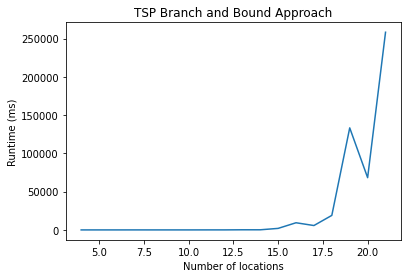

In [ ]:
# Plot Branch and Bound TSP execution runtime (in milliseconds) vs number of locations
plt.plot(*zip(*bb_plot))
plt.title("TSP Branch and Bound Approach")
plt.xlabel("Number of locations")
plt.ylabel("Runtime (ms)")
plt.show()

In [ ]:
# Create a Datframe to make An Informative Route Plan For the Drone
test_df = pd.DataFrame(columns = ['start_address','start_lat','start_lon','end_address','end_lat','end_lon', 'distance'])

In [ ]:
for i in range(N):
  new_row = {
      "start_address": df.iat[path_to_take[i], 1],
      "start_lat": df.iat[path_to_take[i], 2],
      "start_lon": df.iat[path_to_take[i], 3],
      "end_address": df.iat[path_to_take[i+1], 1],
      "end_lat": df.iat[path_to_take[i+1], 2],
      "end_lon": df.iat[path_to_take[i+1], 3],
      "distance": haversine(df.iloc[i]["latitude"], df.iloc[i]["longitude"], df.iloc[i+1]["latitude"], df.iloc[i+1]["longitude"])
  }
  test_df = test_df.append(new_row, ignore_index=True)
  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   Address     25 non-null     object 
 2   latitude    25 non-null     float64
 3   longitude   25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
len(path_to_take)

21

In [ ]:
test_df

,start_address,start_lat,start_lon,end_address,end_lat,end_lon,distance
0,"1 Washington Sq, San Jose, CA 95192",37.340000,-121.880000,"E William St & S 16th St, San Jose, CA 95112",37.335841,-121.869643,1.033362
1,"E William St & S 16th St, San Jose, CA 95112",37.335841,-121.869643,"1117 Woodborough Dr, San Jose, CA 95116",37.334769,-121.865578,1.993223
2,"1117 Woodborough Dr, San Jose, CA 95116",37.334769,-121.865578,"955 S Sixth St, San Jose, CA 95112",37.324138,-121.875518,2.271002
3,"955 S Sixth St, San Jose, CA 95112",37.324138,-121.875518,"350 E Humboldt St #300, San Jose, CA 95112",37.318312,-121.869670,0.740372
4,"350 E Humboldt St #300, San Jose, CA 95112",37.318312,-121.869670,"Floyd St, San Jose, CA 95110",37.315055,-121.878636,1.554774
5,"Floyd St, San Jose, CA 95110",37.315055,-121.878636,"1135 Lick Ave, San Jose, CA 95110",37.314624,-121.884678,0.520854
6,"1135 Lick Ave, San Jose, CA 95110",37.314624,-121.884678,"805 Harliss Ave, San Jose, CA 95110",37.319616,-121.888570,1.569742
7,"805 Harliss Ave, San Jose, CA 95110",37.319616,-121.888570,"510 S First St, San Jose, CA 95113",37.328488,-121.884455,2.491889
8,"510 S First St, San Jose, CA 95113",37.328488,-121.884455,"249-225 E William St, San Jose, CA 95112",37.331108,-121.879572,3.105112
9,"249-225 E William St, San Jose, CA 95112",37.331108,-121.879572,"Paseo De San Antonio at, S Second St, San Jose...",37.333396,-121.887047,1.518835


In [ ]:
# Copy dataframe main dataframe for plotting purposes 
df_map_display = test_df.copy()

In [ ]:
#  Append start address to last row of dataframe - this is purely for plotting the map - the start address is already a destination in the dataframe, but we artifically add it as an origin as the map function uses a single column
last_row = {
      "start_address": df.iat[path_to_take[0], 1],
      "start_lat": df.iat[path_to_take[0], 2],
      "start_lon": df.iat[path_to_take[0], 3]
}
df_map_display = df_map_display.append(last_row, ignore_index=True)

In [ ]:
# Plot Route on Map
fig_2 = px.line_mapbox(df_map_display, lat="start_lat", lon="start_lon", hover_name="start_address", zoom=11, height=300)

fig_2.update_layout(mapbox_style="open-street-map", mapbox_zoom=11, 
    margin={"r":0,"t":0,"l":0,"b":0})

fig_2.show()